In [ ]:
data_dir = './data/'
import numpy as np

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

-0.3565440896138058
7.523890956067452e-06
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


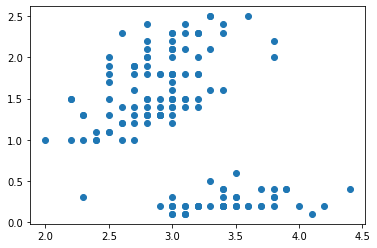

In [ ]:
######### 練習1 ###########
## アイリスデータ解析
# sepal width と petal width の相関
iris = pd.read_csv(data_dir+'iris.csv')
plt.scatter(iris.iloc[:,1], iris.iloc[:,3])  # 分布を見る
# 相関係数rとp値を算出
r,p = scipy.stats.pearsonr(iris.iloc[:,1], iris.iloc[:,3])
print(r)
print(p)

# 相関マップ
R = np.corrcoef([iris.iloc[:,0], iris.iloc[:,1],
                 iris.iloc[:,2], iris.iloc[:,3]])
print(R)


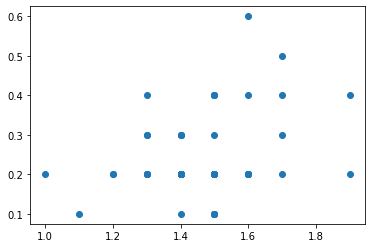

0.30630821115803564
0.030507161205929154


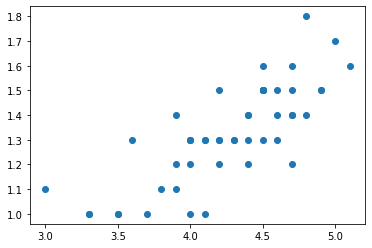

0.7866680885228169
1.27191570632364e-11


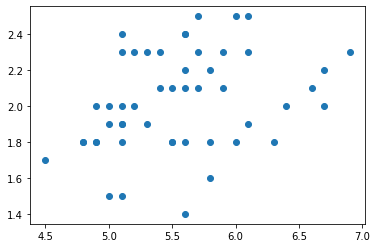

0.32210821590031835
0.022535767279873883


In [ ]:
######### 練習2 ###########
## アイリスデータ解析
# iris data 読み込み
iris=pd.read_csv(data_dir+'iris.csv')

# classごとにデータを分類
irisSetosa = iris[iris.iloc[:,4]=='Iris-setosa']
irisVersicolor = iris[iris.iloc[:,4]=='Iris-versicolor']
irisVirginica = iris[iris.iloc[:,4]=='Iris-virginica']

# class ごとに　petal length と petal width の相関係数 r と有意確率 p を求める
# setosa
plt.scatter(irisSetosa.iloc[:,2], irisSetosa.iloc[:,3]) # 分布を見る
plt.show()
r,p = scipy.stats.pearsonr(irisSetosa.iloc[:,2], irisSetosa.iloc[:,3])
print(r)
print(p)

# versicolor
plt.scatter(irisVersicolor.iloc[:,2], irisVersicolor.iloc[:,3]) # 分布を見る
plt.show()
r,p = scipy.stats.pearsonr(irisVersicolor.iloc[:,2], irisVersicolor.iloc[:,3])
print(r)
print(p)

# virginica
plt.scatter(irisVirginica.iloc[:,2], irisVirginica.iloc[:,3]) # 分布を見る
plt.show()
r,p = scipy.stats.pearsonr(irisVirginica.iloc[:,2], irisVirginica.iloc[:,3])
print(r)
print(p)


                            OLS Regression Results                            
Dep. Variable:                     Ht   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     312.6
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           9.64e-43
Time:                        23:22:28   Log-Likelihood:                -650.76
No. Observations:                 202   AIC:                             1306.
Df Residuals:                     200   BIC:                             1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.1583      2.355     59.082      0.0

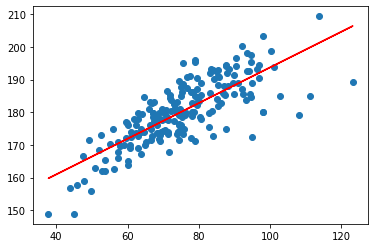

In [ ]:
######### 練習3 ###########
# 回帰
# 体重から身長を回帰
from statsmodels import api as sm
import matplotlib.pyplot as plt

ais = pd.read_csv(data_dir+'ais.csv')
X = ais.Wt  # 体重(Wt)を説明変数にセット
X = sm.add_constant(X)  # 定数項を付ける
Y = ais.Ht  # 身長(Ht)を目的変数にセット
model = sm.OLS(Y,X)  # 最小二乗回帰モデル(OLS)を設定
result = model.fit()  # モデルの学習
print(result.summary())  # 実行結果を表示

plt.scatter(x=ais.Wt,y=ais.Ht) and plt.plot(ais.Wt, model.fit().predict(X),c="red")


                            OLS Regression Results                            
Dep. Variable:                     Wt   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     665.1
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           7.63e-89
Time:                        23:25:33   Log-Likelihood:                -612.18
No. Observations:                 202   AIC:                             1230.
Df Residuals:                     199   BIC:                             1240.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7334      8.845     -0.987      0.3

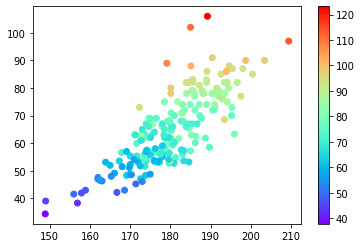

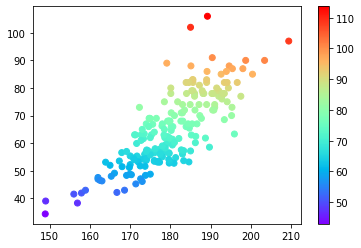

In [ ]:
######### 練習4 ###########
# 重回帰
# 例１：身長とLBMから体重を予測
X = ais[['Ht', 'LBM']]  # 説明変数にHt(身長)とLBMを設定
X = sm.add_constant(X)  # 定数項を付ける
Y = ais.Wt  # 目的変数にWt(体重を設定)
model = sm.OLS(Y,X)
result = model.fit()
print(result.summary())

# 実際の可視化
plt.scatter(x=X.Ht, y=X.LBM, c=Y,
            cmap='rainbow') and plt.colorbar()
plt.show()
# 予測の可視化
plt.scatter(x=X.Ht, y=X.LBM, c=model.fit().predict(X),
            cmap='rainbow') and plt.colorbar()
plt.show()
